## <font color='blue'>2.1.2 Regresión no lineal </font>

Para comprender mejor el problema de regresión, vamos analizar un problema real.

Los Trilotrópicos son insectos imaginarios que viven en las latitudes tropicales. Conocer su densidad de escamas es muy importante para poder saber qué insecticida aplicar. Pero **es muy costoso** contar las escamas.

Creemos que existe una relación entre la **longitud** y la **densidad de escamas** y queremos un modelo que prediga la densidad **a partir de la longitud**.

Esto es una tarea de regresión, ya que la predicción $\in \mathbb{R}$

Tenemos **datos anotados** (alguien contó las escamas de unos cuantos trilotrópicos) $\rightarrow$ estamos ante una tarea de **aprendizaje supervisado**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
%matplotlib inline

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


(150, 2)


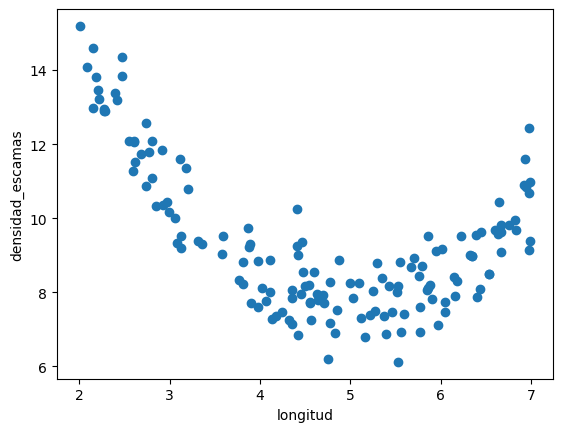

In [ ]:
d = pd.read_csv("/content/gdrive/MyDrive/DOCENCIA/PreGrado/MachineLearning/ML-UCSP/CONTENIDO 2025/Dataset/trilotropicos.csv")
print (d.shape)
plt.scatter(d.longitud, d.densidad_escamas)
plt.xlabel(d.columns[0])
plt.ylabel(d.columns[1]);

In [ ]:
d.head()

,longitud,densidad_escamas
0,3.817195,8.810027
1,2.154586,12.980476
2,6.223221,9.507771
3,5.898173,7.812593
4,5.553022,8.818914


### <font color='blue'>  Usando una estrategia de alto nivel (caja negra): </font>

In [ ]:
def plot_model(w, prediction):
    xr = np.linspace(np.min(d.longitud), np.max(d.longitud), 100)
    plt.scatter(d.longitud, d.densidad_escamas, s=40, alpha=.2, color="blue", label="")
    plt.plot(xr,prediction(w,xr), lw=2, color="black")
    plt.title("   ".join([r"$w_%d$=%.2f"%(i, w[i]) for i in range(len(w))]));

    p = d.iloc[np.random.randint(len(d))]
    pred = prediction(w, p.longitud)
    plt.plot([p.longitud, p.longitud], [p.densidad_escamas, pred], ls="--", color="gray", label=u"error de predicción")
    plt.scatter(p.longitud, p.densidad_escamas, s=70, alpha=.5, color="red", label="random trilobite")
    plt.scatter(p.longitud, pred, s=70, alpha=1., color="black", label=u"predicción")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.xlabel(d.columns[0])
    plt.ylabel(d.columns[1]);

def linear_prediction(w, x):
    w0,w1 = w
    return w0 + w1*x

def J(t, x, y, prediction):
    return np.mean( (prediction(t,x)-y)**2)

$$f({\bf x}^{(l)},{\bf w} )= w_0 +w_1 x^{(l)}$$

$$f({\bf x}^{(l)},{\bf w} )= [w_0 ~~ w_1] [1~~x^{(l)}]^{\top}$$

$${\bf x}_e^{(l)} = [1~~x^{(l)}]$$





In [ ]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(d.longitud.values.reshape(-1,1), d.densidad_escamas)
LR

LinearRegression()

12.689998055222224 -0.718059076098539
error total 2.74


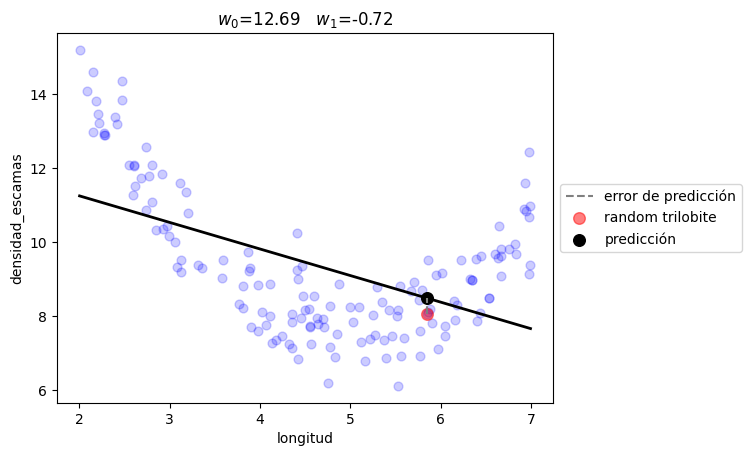

In [ ]:
w0, w1 = LR.intercept_, LR.coef_[0]

print (w0, w1)

plot_model([w0,w1], linear_prediction)

print ("error total %.2f"%(J([w0, w1], d.longitud, d.densidad_escamas, linear_prediction)))


### Otra forma de modelo

esta vez con tres parámetros y un término **cuadrático**

$$\hat{y}^{(l)} = w_0 + w_1 x^{(l)} + w_2 (x^{(l)})^2$$

$$f({\bf x}^{(l)},{\bf w} )= [w_0 ~~ w_1~~w_2] [1~~x^{(l)} ~~(x^{(l)})^2]^{\top}$$

$${\bf x}_e^{(l)} = [1~~x^{(l)} ~~(x^{(l)})^2]$$

In [ ]:
LR = LinearRegression()
x = np.r_[[d.longitud.values, d.longitud.values**2]].T
LR.fit(x, d.densidad_escamas)
w0, (w1, w2) = LR.intercept_, LR.coef_
w0, w1, w2

(np.float64(26.75883713364987),
 np.float64(-7.610553466924379),
 np.float64(0.7570201016172382))

In [ ]:
def quad_prediction(w, x):
    w0,w1,w2 = w
    return w0 + w1*x + w2*x**2

error total 0.55


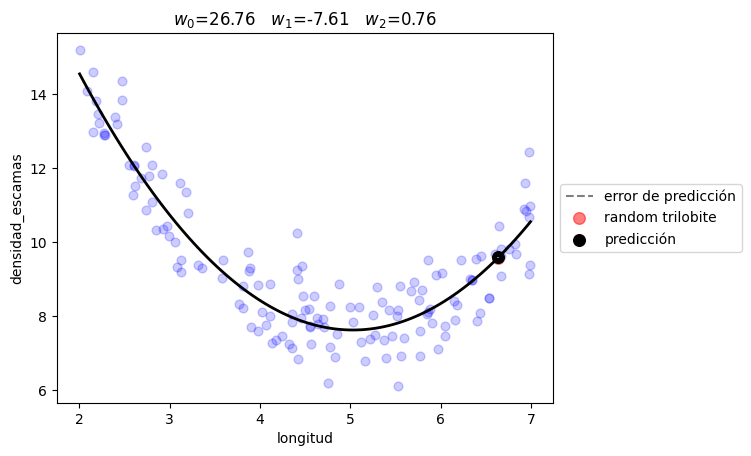

In [ ]:
#entrenando con enfoque de nivel intermedio
plot_model([w0,w1,w2], quad_prediction)
print ("error total %.2f"%(J([w0,w1,w2], d.longitud, d.densidad_escamas, quad_prediction)))

### Otra forma de modelo

esta vez con tres parámetros y un término **grado M**

$$\hat{y}^{(l)} = w_0 + w_1 x^{(l)} + w_2 (x^{(l)})^2+\cdots+w_M (x^{(l)})^M$$

$$f({\bf x}^{(l)},{\bf w} )= [w_0 ~~ w_1~~w_2\cdots~~w_M] [1~~x^{(l)} ~~(x^{(l)})^2\cdots ~~(x^{(l)})^M]^{\top}$$

$${\bf x}_e^{(l)} = [1~~x^{(l)} ~~(x^{(l)})^2 \cdots ~~(x^{(l)})^M]$$

En general podemos pasar los datos por culquier función de transformación.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

x = d.longitud.values.reshape(-1,1)
y = d.densidad_escamas

polyFeat = PolynomialFeatures(degree=5,include_bias=False) # generando la instancia para expansión polinomica

polyFeat = polyFeat.fit(x,y) # expansión polinómica

x_poly = polyFeat.transform(x) # transforación de los datos

LR = LinearRegression() # Instancia del modelo de regresión

LR.fit(x_poly, y) #Entrenando el modelo

y_hat = LR.predict(x_poly) #hacemos las predicciones




In [ ]:
LR.coef_

array([ 9.94767224, -9.13967039,  2.61820315, -0.32714891,  0.01555395])

In [ ]:
LR.intercept_

np.float64(15.09105649531865)

In [ ]:
w0, (w1,w2,w3,w4,w5) = LR.intercept_ , LR.coef_
w0 , w1,w2,w3,w4,w5

(np.float64(15.09105649531865),
 np.float64(9.947672236557644),
 np.float64(-9.139670390754304),
 np.float64(2.6182031495539713),
 np.float64(-0.3271489115565293),
 np.float64(0.015553949150642591))

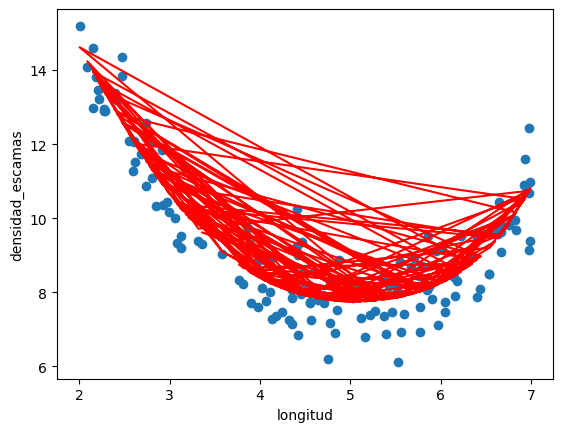

In [ ]:
plt.plot(x,y_hat,'r' )
plt.scatter(d.longitud, d.densidad_escamas)
plt.xlabel(d.columns[0])
plt.ylabel(d.columns[1]);

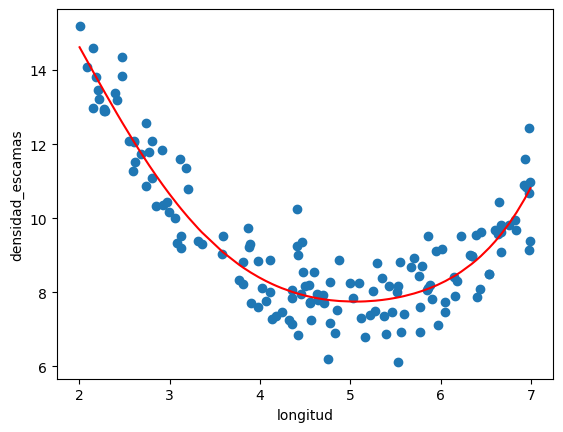

In [ ]:
x = d.longitud.values
ind = np.argsort(x,axis=0)
x_sort = np.take_along_axis(x,ind,axis=0)
y_sort = np.take_along_axis(y_hat,ind,axis=0)
plt.plot(x_sort,y_sort,'r' )

plt.scatter(d.longitud, d.densidad_escamas)
plt.xlabel(d.columns[0])
plt.ylabel(d.columns[1]);

In [ ]:
error = np.mean( (y_hat-y)**2)
error

np.float64(0.5434764762670172)

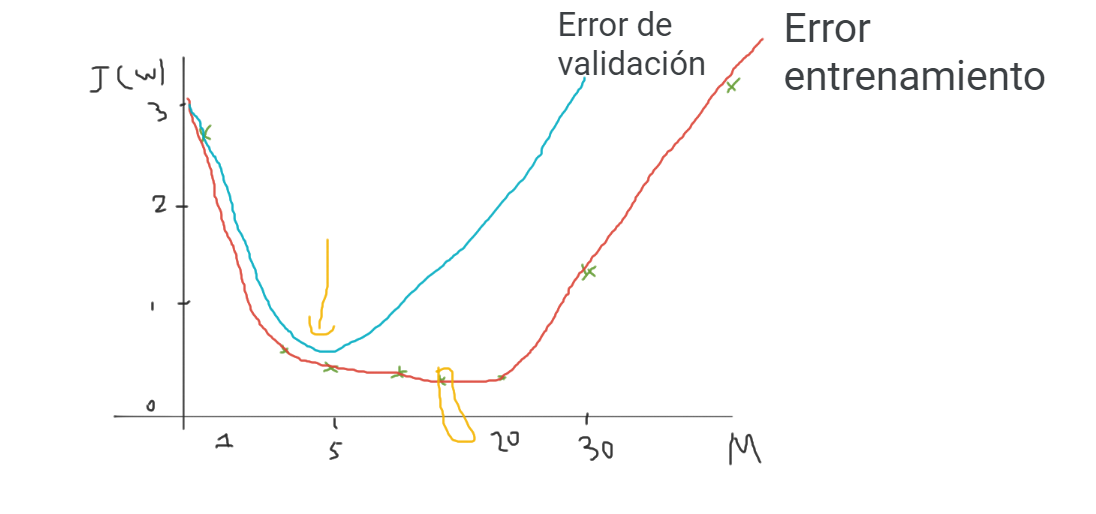

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x = d.longitud.values.reshape(-1, 1)
y = d.densidad_escamas

# Split the data into training and validation sets (80% train, 20% validation)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

print("Training data shape (x_train, y_train):", x_train.shape, y_train.shape)
print("Validation data shape (x_val, y_val):", x_val.shape, y_val.shape)

Training data shape (x_train, y_train): (120, 1) (120,)
Validation data shape (x_val, y_val): (30, 1) (30,)


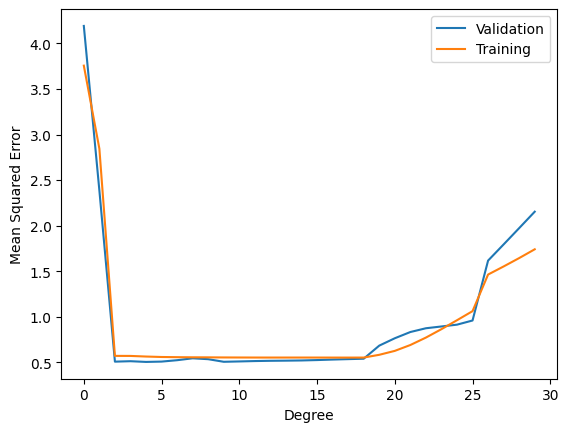

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Split the data into training and validation sets (80% train, 20% validation)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

J_val = {} # Dictionary to store the mean squared error for each degree
J_train = {} # Dictionary to store the mean squared error for each degree

for i in range(30):
  x_poly_train = PolynomialFeatures(degree=i).fit_transform(x_train)
  x_poly_val = PolynomialFeatures(degree=i).fit_transform(x_val) # Transform validation data as well
  LR = LinearRegression()
  LR.fit(x_poly_train, y_train)
  y_pred_val = LR.predict(x_poly_val) # Predict on validation data
  y_pred_train = LR.predict(x_poly_train) # Predict on validation data
  J_val[i] = np.mean((y_pred_val - y_val)**2)
  J_train[i] = np.mean((y_pred_train - y_train)**2)

plt.plot(list(J_val.keys()), list(J_val.values()), label='Validation')
plt.plot(list(J_train.keys()), list(J_train.values()), label='Training')
plt.xlabel('Degree')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [ ]:
history

LinearRegression()

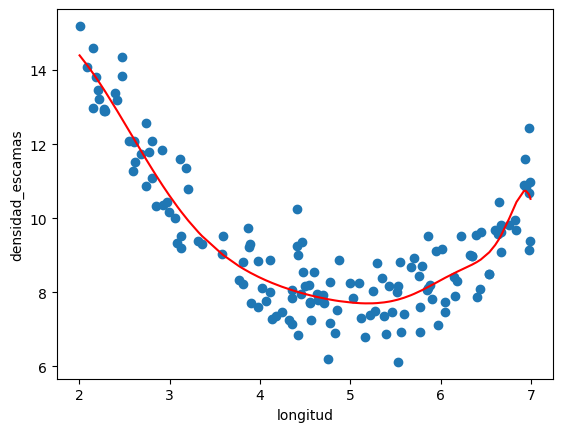

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

x = d.longitud.values.reshape(-1,1)
y = d.densidad_escamas

polyFeat = PolynomialFeatures(degree=17,include_bias=False) # generando la instancia para expansión polinomica

polyFeat = polyFeat.fit(x,y) # expansión polinómica

x_poly = polyFeat.transform(x) # transforación de los datos

LR = LinearRegression() # Instancia del modelo de regresión

LR.fit(x_poly, y) #Entrenando el modelo

y_hat = LR.predict(x_poly) #hacemos las predicciones

x = d.longitud.values
ind = np.argsort(x,axis=0)
x_sort = np.take_along_axis(x,ind,axis=0)
y_sort = np.take_along_axis(y_hat,ind,axis=0)
plt.plot(x_sort,y_sort,'r' )

plt.scatter(d.longitud, d.densidad_escamas)
plt.xlabel(d.columns[0])
plt.ylabel(d.columns[1]);

----------------------------------------------------------------------------------------------------------------------------------------------

#### Bibliografy

[1] Bishop, C.M. Pattern Recognition and Machine Learning. Springer, 2006.
[2] Murphy K.P., Machine Learning: A Probabilistic Perspective. The MIT Press, 2012.

Iteration 100, Cost: 14.0171
Iteration 200, Cost: 10.7221
Iteration 300, Cost: 8.3903
Iteration 400, Cost: 6.7401
Iteration 500, Cost: 5.5722
Iteration 600, Cost: 4.7457
Iteration 700, Cost: 4.1608
Iteration 800, Cost: 3.7469
Iteration 900, Cost: 3.4540
Iteration 1000, Cost: 3.2467
Iteration 1100, Cost: 3.1000
Iteration 1200, Cost: 2.9961
Iteration 1300, Cost: 2.9227
Iteration 1400, Cost: 2.8707
Iteration 1500, Cost: 2.8339
Iteration 1600, Cost: 2.8078
Iteration 1700, Cost: 2.7894
Iteration 1800, Cost: 2.7763
Iteration 1900, Cost: 2.7671
Iteration 2000, Cost: 2.7606
Iteration 2100, Cost: 2.7560
Iteration 2200, Cost: 2.7527
Iteration 2300, Cost: 2.7504
Iteration 2400, Cost: 2.7487
Iteration 2500, Cost: 2.7476
Iteration 2600, Cost: 2.7468
Iteration 2700, Cost: 2.7462
Iteration 2800, Cost: 2.7458
Iteration 2900, Cost: 2.7455
Iteration 3000, Cost: 2.7453
Iteration 3100, Cost: 2.7451
Iteration 3200, Cost: 2.7450
Iteration 3300, Cost: 2.7449
Iteration 3400, Cost: 2.7449
Iteration 3500, Cost:

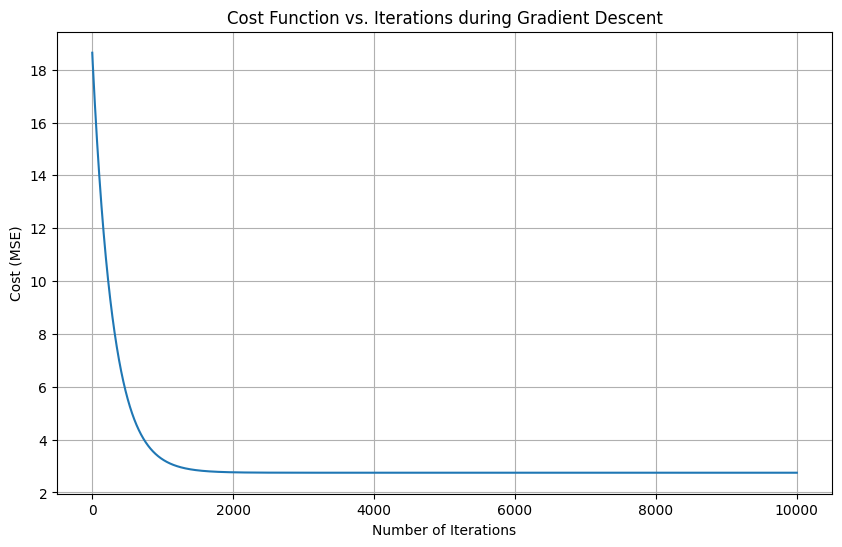

Final weights (w0, w1): 12.6900, -0.7181


In [ ]:
# Implementación de Descenso de Gradiente para un modelo lineal simple

# Función de predicción lineal
def linear_prediction_gd(w, x):
    w0, w1 = w
    return w0 + w1 * x

# Función de coste (MSE)
def J_gd(w, x, y):
    return np.mean((linear_prediction_gd(w, x) - y)**2)

# Descenso de Gradiente
def gradient_descent(x, y, learning_rate, num_iterations):
    # Inicializar pesos aleatoriamente
    w = np.random.randn(2)
    cost_history = []

    for i in range(num_iterations):
        # Calcular predicciones
        y_pred = linear_prediction_gd(w, x)

        # Calcular gradientes
        gradient_w0 = np.mean(2 * (y_pred - y))
        gradient_w1 = np.mean(2 * (y_pred - y) * x)

        # Actualizar pesos
        w[0] -= learning_rate * gradient_w0
        w[1] -= learning_rate * gradient_w1

        # Calcular y almacenar el coste
        cost = J_gd(w, x, y)
        cost_history.append(cost)

        # Opcional: imprimir el coste cada cierto número de iteraciones
        if (i + 1) % 100 == 0:
            print(f'Iteration {i+1}, Cost: {cost:.4f}')

    return w, cost_history

# Parámetros del descenso de gradiente
learning_rate = 0.01
num_iterations = 10000

# Ejecutar descenso de gradiente
x_gd = d.longitud.values
y_gd = d.densidad_escamas.values
final_w, cost_history = gradient_descent(x_gd, y_gd, learning_rate, num_iterations)

# Visualizar la función de coste por iteración
plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), cost_history)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function vs. Iterations during Gradient Descent')
plt.grid(True)
plt.show()

print(f'Final weights (w0, w1): {final_w[0]:.4f}, {final_w[1]:.4f}')